# Aritra Banerjee
MDS 2018 28

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("E:\Application\sem2\aml\assignment\data\SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
data = pd.read_csv("E:\Application\sem2\aml\assignment\data\SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

In [3]:
data=data[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [4]:
data.head()
data.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data.drop_duplicates(subset="sms",inplace=True)
data.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,I will lick up every drop :) are you ready to ...
freq,4516,1


In [6]:
sms = data['sms']
label = data['label']

In [7]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = train_test_split(sms, label, random_state=69)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

## TF-IDF Vectorizer 

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)

In [10]:
def set_binary_labels(label):
    if label == 'spam':
        return 1
    else:
        return 0

# Model_1 : Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. 

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
pipeline_svc = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', svc)])

### Calculating Cross Validation score

In [12]:
cv_score_svc = cross_val_score(pipeline_svc, sms_train, label_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_svc)

The cross validation score for Decison Tree is:
[0.98453608 0.97806452 0.98580645 0.98451613 0.98064516]


### Statistics of the fitting

In [13]:
pipeline_svc.fit(sms_train, label_train)
label_predicted = pipeline_svc.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1135
        spam       0.97      0.92      0.95       158

   micro avg       0.99      0.99      0.99      1293
   macro avg       0.98      0.96      0.97      1293
weighted avg       0.99      0.99      0.99      1293



### Precision Recall Curve 

The precision recall curve


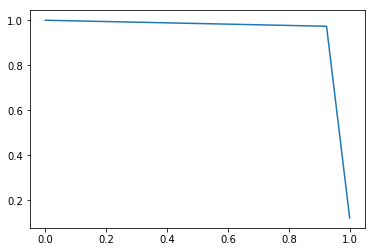

In [14]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_2 : Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', random_forest)])

### Calculating Cross Validation score

In [16]:
cv_score_random_forest = cross_val_score(pipeline_forest, sms_train, label_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
[0.95747423 0.95870968 0.96258065 0.95612903 0.95741935]


### Statistics of the fitting

In [17]:
pipeline_forest.fit(sms_train, label_train)
label_predicted = pipeline_forest.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1135
        spam       0.99      0.75      0.85       158

   micro avg       0.97      0.97      0.97      1293
   macro avg       0.98      0.87      0.92      1293
weighted avg       0.97      0.97      0.97      1293



### Precision Recall Curve

The precision recall curve is:


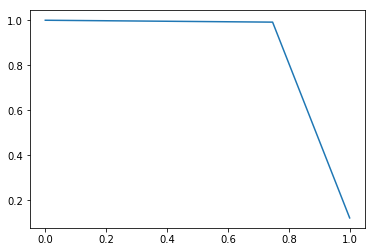

In [18]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_3 : Naive Bayes(Bernoulli)

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. Naive Bayes is a conditional probability model.

Multivariate Bernoulli model is one of the classifiers under Naive Bayes family. In the Multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks. where binary term occurrence features are used rather than term frequencies.

In [19]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', naive_bayes)])

### Calculating Cross Validation score

In [20]:
cv_score_naive_bayes = cross_val_score(pipeline_bayes, sms_train, label_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.96907216 0.96774194 0.96645161 0.97290323 0.97032258]


### Statistics of the fitting 

In [21]:
pipeline_bayes.fit(sms_train, label_train)
label_predicted = pipeline_bayes.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1135
        spam       0.99      0.84      0.91       158

   micro avg       0.98      0.98      0.98      1293
   macro avg       0.99      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



### Precision Recall Curve

The precision recall curve


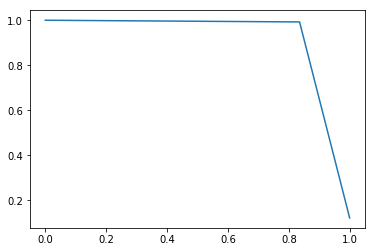

In [22]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)